# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This DataBase Contains information such as popularity, revenues, votes, budget and more on around 5000 movies.

Full list of Columns Contained in the DataBase: 

       'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'
       
where revenue_adj and budget_adj are values in dollar adjusted according to inflation rates

### Question(s) for Analysis
Q1 What are the most popular genre on a each year ?.

Q2 What is the trend of popularity for each genre over the years ?

Q3 How the Number of Movies Produced Changed Over The Years ?

Q4 What kinds of properties are associated with movies that have high revenues?


In [3]:
import random as rand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [7]:
df = pd.read_csv('tmdb.csv')
df.duplicated().sum()

1

Removing 1 Duplicate Row

In [6]:

df.drop_duplicates(inplace=True)
df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

In [ ]:
df.drop(['homepage', 'keywords', 'production_companies','overview'] ,axis = 1, inplace=True)

removed columns that would not be used in the analysis

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 What are the most popular genre on a each year ?

In [12]:
## creating a version of the dataframe where all genres are not null
df_gen = df[df.genres.notna()]
df_gen.reset_index(drop=True, inplace=True)
## Splitting Each Movie Associated with multiple Genres into multiple rows in the dataframe
## this is required to be correctly identify popular genres
adds = []
rems = []
for x in range(df_gen['genres'].size):
    if ("|" in df_gen['genres'][x]):
        genlst = df_gen['genres'][x].split("|")
        rems.append(x)
        row = df_gen.iloc[x, :].copy()
        for gen in genlst:
            tmp = row.copy()
            tmp['genres'] = gen
            adds.append(tmp.values)

df_gen.drop(rems, inplace=True)
adds = pd.DataFrame(adds, columns = df.columns)
df_gen = df_gen.append(adds)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
rel = df_gen.groupby(['release_year', 'genres']).median()['popularity'].unstack()
rel.fillna(0, inplace = True)
rel.max(axis=1)
popyear = rel.idxmax(axis=1)
mostpop = pd.DataFrame(popyear.values, index = popyear.index)
mostpop.transpose()

release_year     1960       1961       1962       1963    1964   1965  \
0             Romance  Animation  Adventure  Animation  Family  Music   

release_year     1966       1967     1968   1969  ...     2006     2007  \
0             Fantasy  Animation  Mystery  Crime  ...  History  Mystery   

release_year       2008       2009       2010     2011     2012   2013  \
0             Adventure  Adventure  Adventure  Western  Fantasy  Crime   

release_year     2014       2015  
0             Western  Adventure  

[1 rows x 56 columns]

In the last cell we display a list of the most popular genre in each year

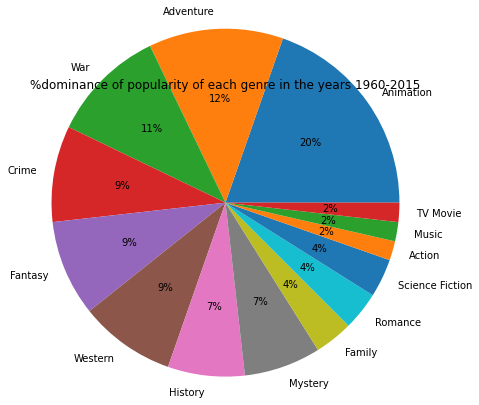

In [14]:
lbls = [x[0] for x in mostpop.value_counts().index.values]
plt.pie(mostpop.value_counts(), labels = lbls, radius=2, autopct='%1.0f%%');
plt.title('%dominance of popularity of each genre in the years 1960-2015');

### Q2 What is the trend of popularity for each genre over the years ?

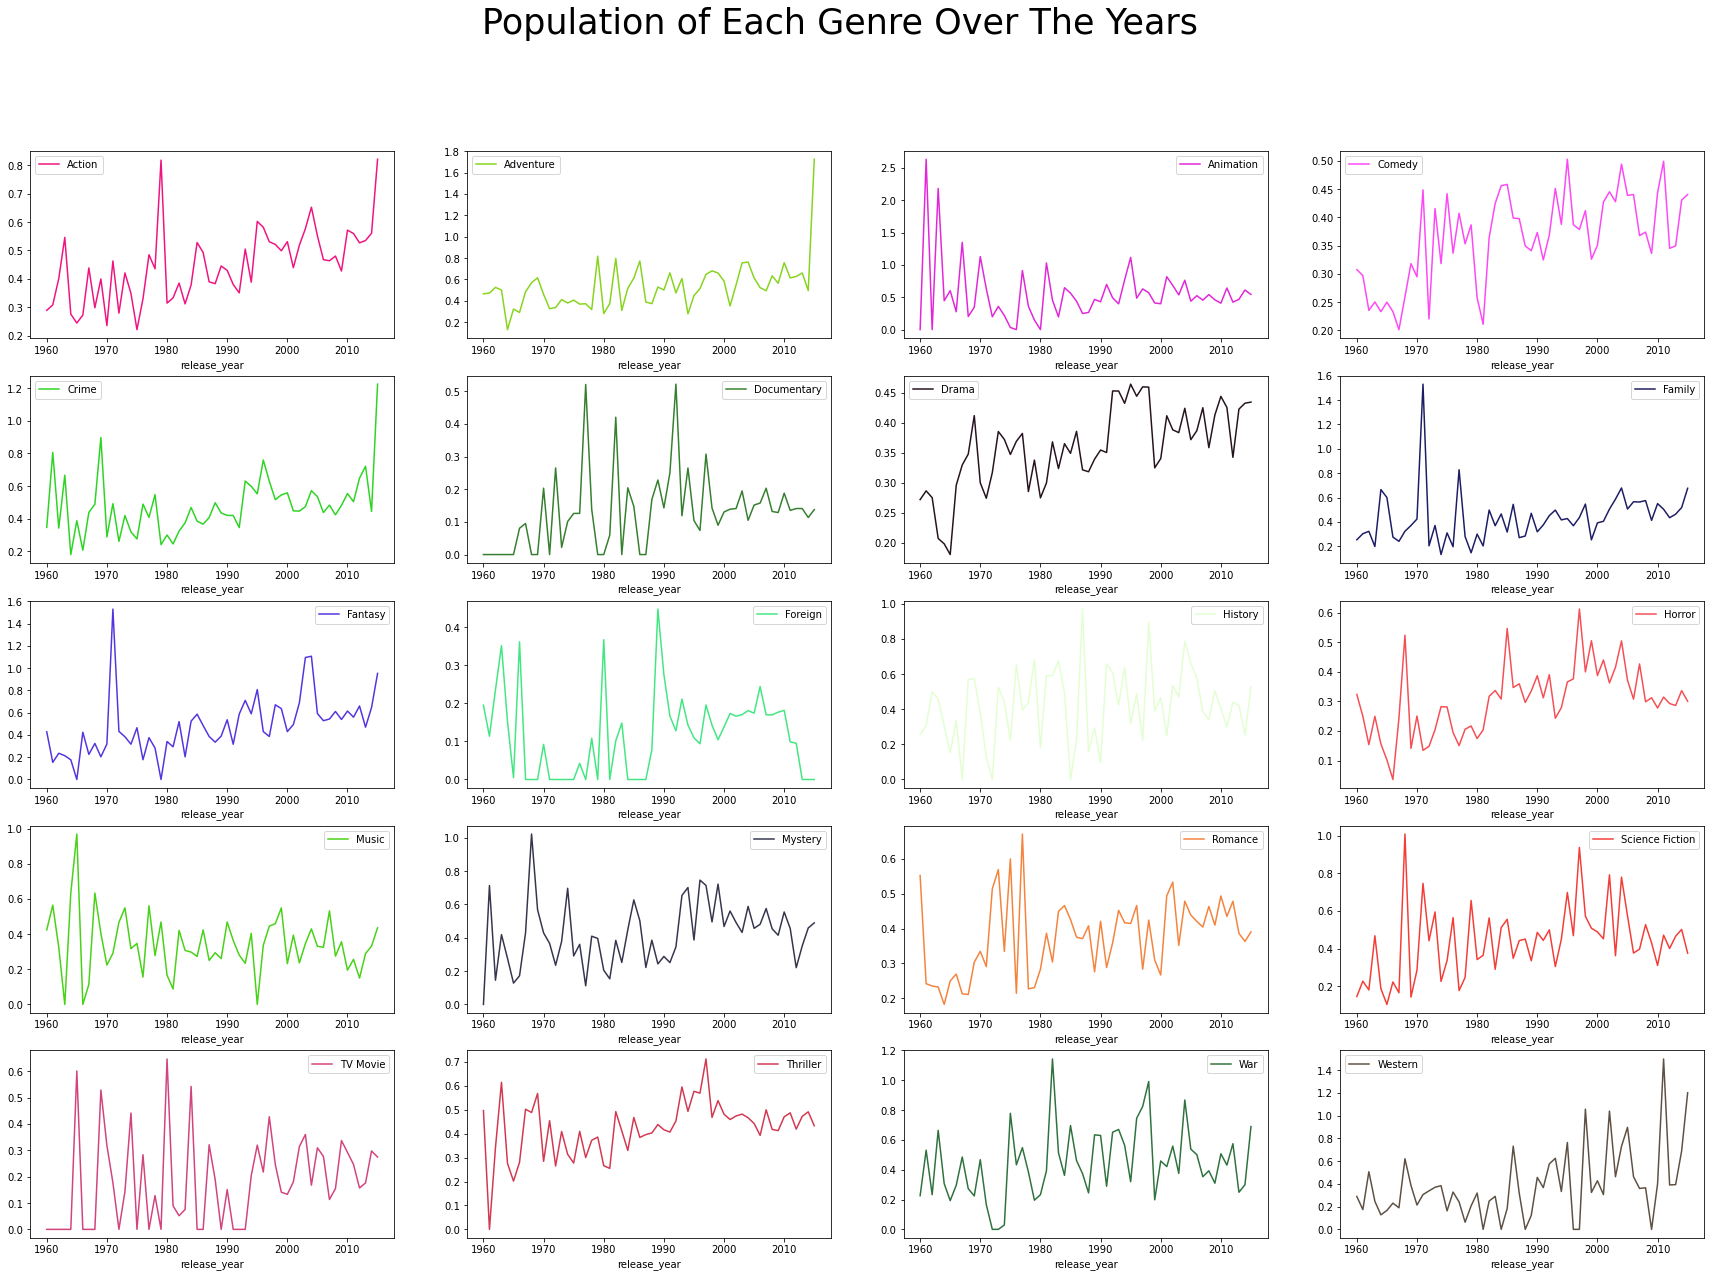

In [15]:
fig, ax = plt.subplots(5,4,figsize = (30,20))
fig.suptitle('Population of Each Genre Over The Years',fontsize = 35)
c = 0
for x in range(5):
    for y in range(4):
        rel.iloc[:,c].plot(legend=True, ax=ax[x][y], color = "#"+''.join(rand.choice('12345678DEF') for j in range(6)));
        c = c + 1


<font size="4"> Q3 How the Number of Movies Produced Changed Over The Years</font>

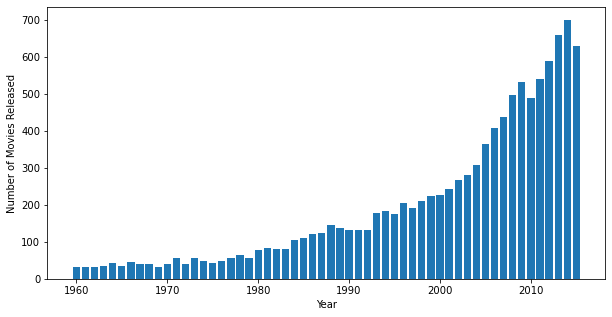

In [16]:
nper = df.groupby('release_year').count()['id']
plt.subplots(figsize=(10,5))
plt.bar(height = nper.values,x = nper.index);
plt.xlabel('Year');
plt.ylabel('Number of Movies Released');

<font size="4"> Q4 What kinds of properties are associated with movies that have high revenues?</font>

In [17]:
df.revenue.isna().sum()

0

In [18]:
## Investigating The Top 25% Movies in Revenue
tope = df.revenue_adj.describe()[-2]
df_highRev = df.query('revenue_adj >= @tope')
##df_highRev.info()

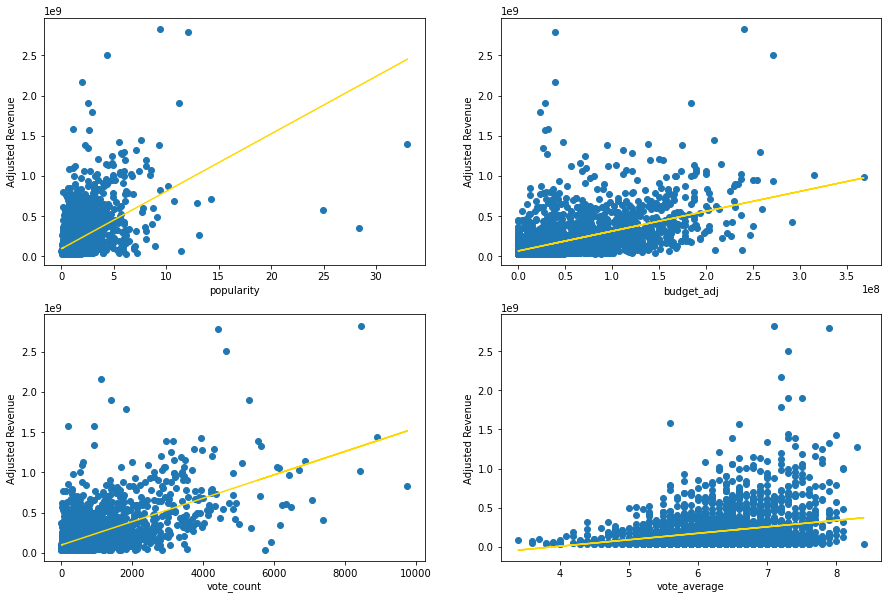

In [19]:
f,grd = plt.subplots(2,2,figsize=(15,10))
xInterest = ['popularity', 'budget_adj', 'vote_count', 'vote_average']
xi = 0
for i in range(2):
    for j in range(2):
        grd[i][j].scatter(df_highRev[xInterest[xi]], df_highRev.revenue_adj)
        grd[i][j].set_xlabel(xInterest[xi])
        grd[i][j].set_ylabel('Adjusted Revenue')
        
        ##creating regression line
        m, b = np.polyfit(df_highRev[xInterest[xi]], df_highRev.revenue_adj,1)
        grd[i][j].plot(df_highRev[xInterest[xi]], df_highRev[xInterest[xi]]*m+b, color='gold')
        xi += 1

<font size="4">Now checking Revenue Relation with Genres and release year </font>

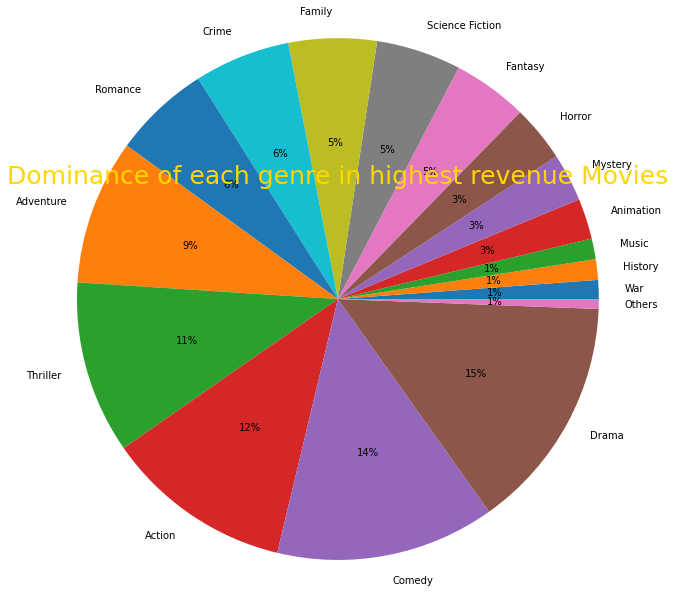

In [20]:
df_gnr = df_gen
tope = df_gnr.revenue_adj.describe()[-2]
df_gnr = df_gnr.query('revenue_adj >= @tope')
gencount = df_gnr.groupby('genres').count()['revenue_adj'].sort_values()
## packing genres which contributions approx to 0% into a group others
gencount['Others'] = gencount['Foreign'] + gencount['TV Movie'] + gencount['Documentary'] + gencount['Western']
gencount.drop(['Foreign', 'TV Movie', 'Documentary', 'Western'], inplace = True)
plt.pie(gencount.values, labels = gencount.index, radius = 3, autopct='%1.0f%%', labeldistance=1.1);
plt.title('Dominance of each genre in highest revenue Movies', color = 'gold', size =25);

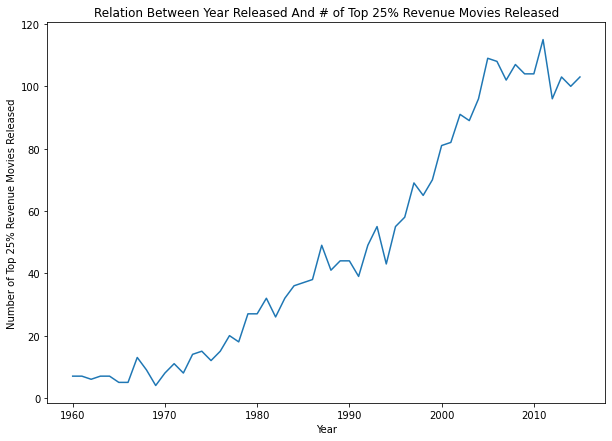

In [22]:
countyr = df_highRev.groupby('release_year').count()['revenue_adj']
plt.subplots(figsize=(10,7))
plt.plot(countyr.index, countyr.values);
plt.xlabel('Year');
plt.ylabel('Number of Top 25% Revenue Movies Released');
plt.title('Relation Between Year Released And # of Top 25% Revenue Movies Released');

<a id='conclusions'></a>
## Conclusions

1- Choosing The Right Genre Has a High Correlation on the movie popularity

2- Popularity of each genre fluctuates throughout the years with no long-term trends
   Number of Movies Made each year is on a steady rise

3-popularity, budget, vote count and average are all positevly correlated with the Revenue

4- Movie Genre has High influence on the Revenue with Drama, Comedy , Action and Thriller having the bigest share in the highest revenue Movies

5- The Year of Release is Highly Correlated To the Making of High Revenue Movies

### Limitations
No Statistical Tests have been used in the analysis

Additional Research could be done on the Multiple Columns in the DataSet that has been dropped out or not used in the analysis 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1